In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functions import material_image, plot_material_image, plot_KMeans1D


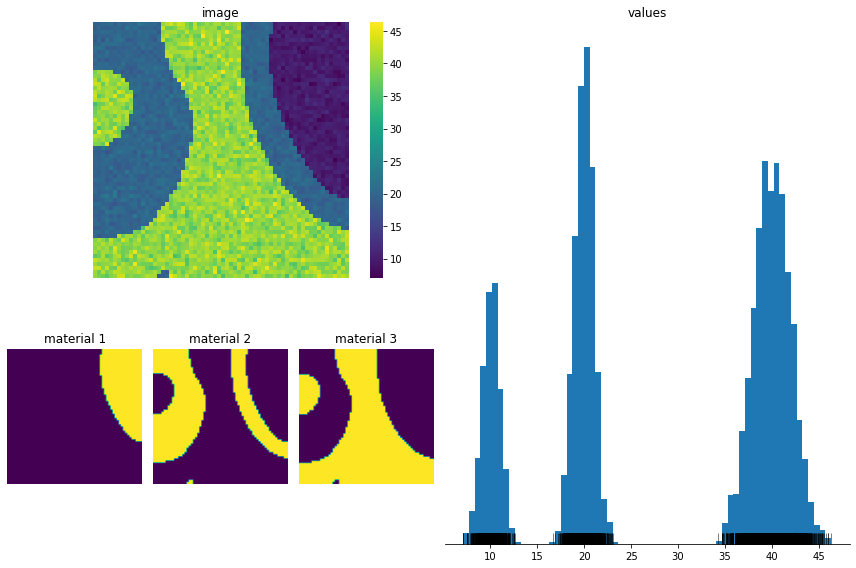

In [2]:
distinct_image, distinct_materials = material_image(
    populations=(1, 2, 3),
    means=(10, 20, 40),
    stds=(1, 1, 2),
    image_size=64,
)

fig = plot_material_image(distinct_image, distinct_materials);

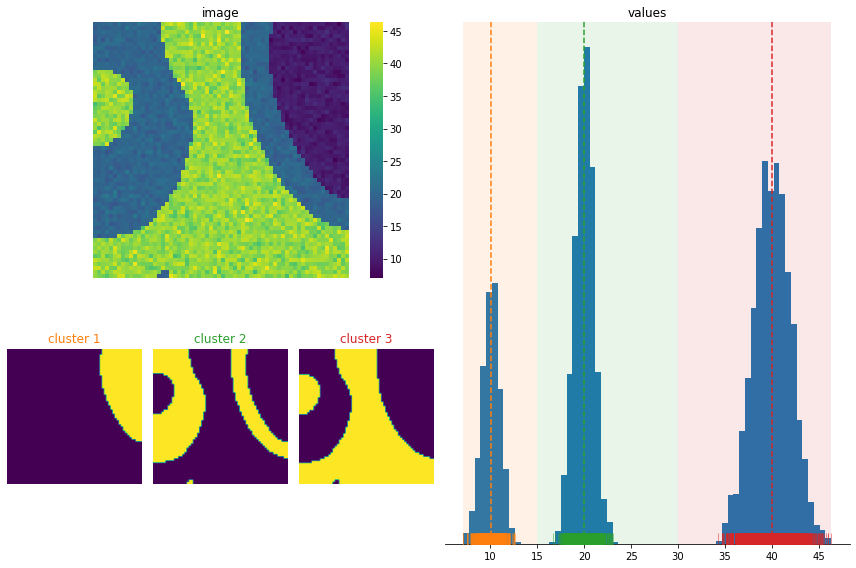

In [3]:
fig, kmeans_distinct = plot_KMeans1D(distinct_image, k=3);

In [4]:
24**2


576